In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])



In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
X_st = X.copy().astype(np.float64)
X_st

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def calc_std_feat(x):
    return (x - x.mean())/x.std()

In [7]:
def calc_norm_feat(x):
    return (x - x.min())/(x.max() - x.min())

In [8]:
X_st[1] = calc_std_feat(X_st[1])
X_st[2] = calc_std_feat(X_st[2])
X_st[3] = calc_std_feat(X_st[3])

In [9]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X_st.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * sum((X * (y_pred - y)).T)))
        if i % (iterations/10) == 0:
            print(i, W, err)
    return i, W, err

In [11]:
eval_model(X_st, y, 30000, alpha=1e-3)

3000 [57.25596707  5.44997126  2.56327661  3.63864307] 39.97590033835188
6000 [57.39964512  5.72674487  2.08904435  3.84253972] 39.83790902510949
9000 [57.39999913  5.89021949  1.81308425  3.95876072] 39.79816319607703
12000 [57.4         5.98641609  1.65244773  4.02537065] 39.78467585098536
15000 [57.4         6.04287122  1.5589184   4.0637064 ] 39.780098267876305
18000 [57.4         6.07593877  1.50445195  4.08583915] 39.77854450115757
21000 [57.4         6.09528006  1.47272944  4.09864743] 39.77801708072007
24000 [57.4         6.10658112  1.45425172  4.10607268] 39.777838044964525
27000 [57.4         6.11317931  1.44348807  4.1103829 ] 39.77777726941179
30000 [57.4         6.11702957  1.43721768  4.11288733] 39.77775663835443


(30000,
 array([57.4       ,  6.11702957,  1.43721768,  4.11288733]),
 39.77775663835443)

In [12]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X_st.shape[0])
    n = X.shape[1]
    n_batch = n//qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = n_batch * b 
            end_ = qty_in_batch * (b+1)
            X_tmp = X[:, start_:end_]
            y_tmp = y[start_:end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * sum((X_tmp * (y_pred_tmp - y_tmp)).T)))
        if i % (iterations/10) == 0:
            print(i, W, err)
            
            print('ошибка для всего датасета по полученным весам -', calc_mse(y, np.dot(W, X)))
    
    return W

In [13]:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=4, alpha=1e-2)

100 [53.74901707  6.39117641  2.70206139  2.82672977] 34.72220406399707
ошибка для всего датасета по полученным весам - 53.559155691144646
200 [57.9876937   5.74180406  2.01921343  3.19997607] 8.1280829503204
ошибка для всего датасета по полученным весам - 40.685834065809985
300 [58.34092148  5.4880083   1.75042416  3.6608508 ] 6.152745670553939
ошибка для всего датасета по полученным весам - 41.24360474067464
400 [58.37292141  5.35952241  1.55717751  3.987958  ] 5.326401045648723
ошибка для всего датасета по полученным весам - 41.30117200328432
500 [58.37684807  5.29719019  1.40260789  4.21163833] 4.849666914845753
ошибка для всего датасета по полученным весам - 41.32166393976073
600 [58.3774605   5.27312099  1.27688644  4.36576376] 4.558516446166381
ошибка для всего датасета по полученным весам - 41.340403547315184
700 [58.37724459  5.27079111  1.174032    4.47349362] 4.3774133849291434
ошибка для всего датасета по полученным весам - 41.356429945331385
800 [58.376681    5.28015142  1

array([58.37523256,  5.31225148,  0.96253419,  4.64601711])

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [14]:
def eval_model_ridge(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * ((1/n * 2 * sum((X * (y_pred - y)).T)) + lambda_ * W)
    print('ошибка -', calc_mse(y, np.dot(W, X)))
    return W

In [15]:
W_1 = eval_model_ridge(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-0)
W_2 = eval_model_ridge(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-8)

ошибка - 409.54048991996615
ошибка - 39.80701205693764


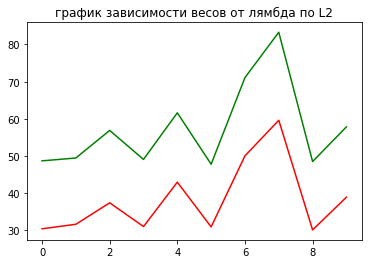

In [16]:
plt.title('график зависимости весов от лямбда по L2')
plt.plot(np.dot(W_1, X_st), color='r');
plt.plot(np.dot(W_2, X_st), color='g');

###  2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [17]:
calc_norm_feat(X[1])

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [18]:
X_1_norm = calc_norm_feat(X[1])
calc_std_feat(X_1_norm)

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [19]:
calc_std_feat(X[1])

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [20]:
X_1_std = calc_std_feat(X[1])
X_1_norm = calc_norm_feat(X_1_std)
X_1_norm

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

#### Как видно из полученных результатов в этом нет никакого смысла

### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [30]:
def eval_model_lasso(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * ((1/n * 2 * sum((X * (y_pred - y)).T)) + lambda_ * np.sum(W/np.abs(W)))
    print('ошибка -', calc_mse(y, np.dot(W, X)))
    return W

In [32]:
W_1 = eval_model_lasso(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-0)
W_2 = eval_model_lasso(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-8)

ошибка - 48.16248831649902
ошибка - 39.80701204709301


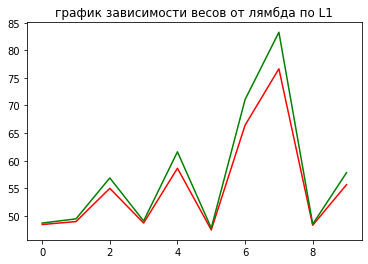

In [34]:
plt.title('график зависимости весов от лямбда по L1')
plt.plot(np.dot(W_1, X_st), color='r');
plt.plot(np.dot(W_2, X_st), color='g');